# 911 Calls Project

Some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert) will be analysed in this project. 
The data contains following fields:
* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [360]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
df = pd.read_csv('911.csv')

** Geting more information about data **

In [361]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## Analysis

** Finding top 5 zipcodes for 911 calls **

In [363]:
dfTop5ZipCodes = df.groupby('zip').count().sort_values(by='e', ascending=False).head(5)['e']
dfTop5ZipCodes

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: e, dtype: int64

** Finding top 5 townships (twp) for 911 calls **

In [364]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Finding unique number of title codes **

In [365]:
df['title'].value_counts().count()

110

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. A new column called "Reason" that contains this string value is created.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [366]:
df['Reason'] = df['title'].apply(lambda t:t.split(':')[0])

In [367]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS


** Finding most common Reason for a 911 call based off of newly created Reason column. **

In [368]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Creating a countplot of 911 calls by Reason. **

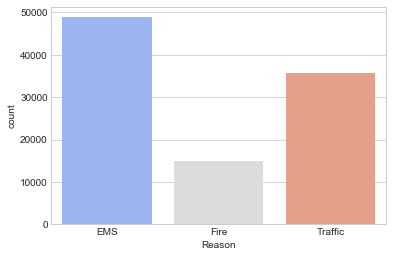

In [369]:
sns.countplot(x='Reason',data=df,palette='coolwarm')

___
** Now focus is on time information. Data type of the objects in the timeStamp column is string. So that converting the column from strings to DateTime objects.  **

In [370]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
print type(df.iloc[0]['timeStamp'])

<class 'pandas._libs.tslib.Timestamp'>


** Now timestamp column contains DateTime objects. Extracting Hour, Month, and Day of Week from the timestamp column. **

In [371]:
df['Hour'] = df['timeStamp'].apply(lambda ts: ts.hour)
df['Month'] = df['timeStamp'].apply(lambda ts:ts.month)
df['Day of Week'] = df['timeStamp'].apply(lambda ts: ts.dayofweek)
df[['timeStamp','Hour','Month','Day of Week']].head(2)

,timeStamp,Hour,Month,Day of Week
0,2015-12-10 17:40:00,17,12,3
1,2015-12-10 17:40:00,17,12,3


** Mapping actual string names to the day of the week. **

In [372]:
dayMap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dayMap)
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu


** Creating a countplot of the Day of Week column with the hue based off of the Reason. **

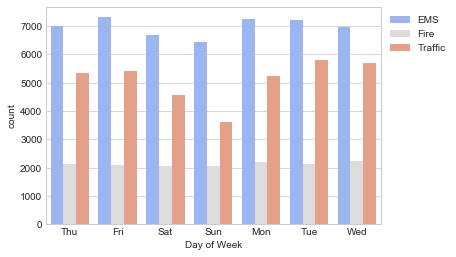

In [374]:
sns.countplot(data=df,x='Day of Week',hue='Reason', palette='coolwarm')
plt.legend(bbox_to_anchor=(1, 1), loc=0)

** Creating a countplot of the Month column with the hue based off of the Reason. **

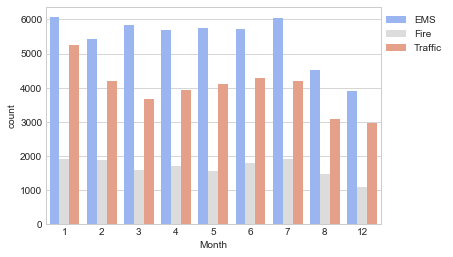

In [375]:
sns.countplot(data=df,x='Month',hue='Reason', palette='coolwarm')
plt.legend(bbox_to_anchor=(1.21,1),loc=0)

**Above countplot is missing some Months, Now filling that by plotting the information in another way. **

In [376]:
monthlyDf = df.groupby('Month').count()
monthlyDf.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467


** Creating a plot off of the dataframe indicating the count of calls per month. **

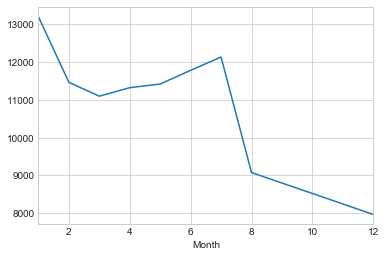

In [377]:
monthlyDf['lat'].plot()

** Creating a linear fit on the number of calls per month.**

In [378]:
monthlyDf = monthlyDf.reset_index()
monthlyDf.head(2)

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467


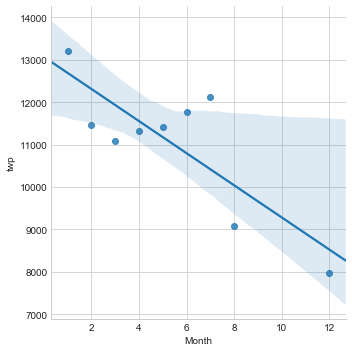

In [379]:
sns.lmplot(x='Month',y='twp',data=monthlyDf)

**Creating a new column called 'Date' that contains the date from the timeStamp column.** 

In [380]:
df['Date'] = df['timeStamp'].apply(lambda ts:ts.date())
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10


** groupby Date column with the count() and creating a plot of counts of 911 calls.**

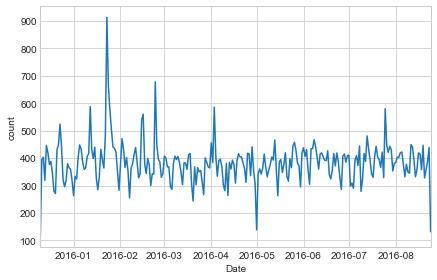

In [381]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.ylabel('count')

** Now creating 3 separate plots with each plot representing a Reason for the 911 call**

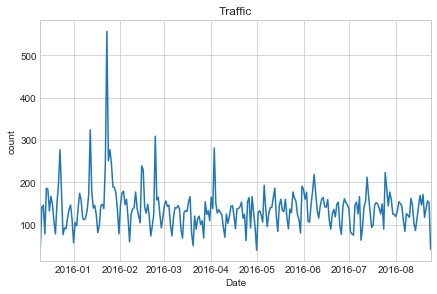

In [382]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Traffic')
plt.ylabel('count')

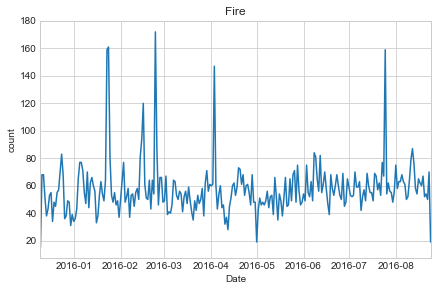

In [383]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Fire')
plt.ylabel('count')

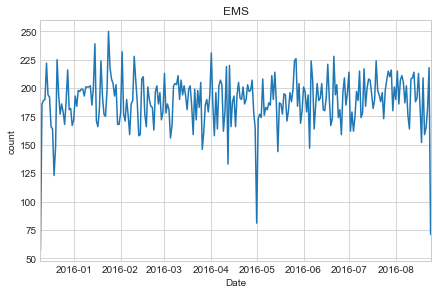

In [384]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('EMS')
plt.ylabel('count')

** Restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. **

In [391]:
dayHourDf = df.groupby(['Day of Week','Hour']).count()['Reason'].unstack()
dayHourDf

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Creating a Heatmap using dayHourDf DataFrame. **

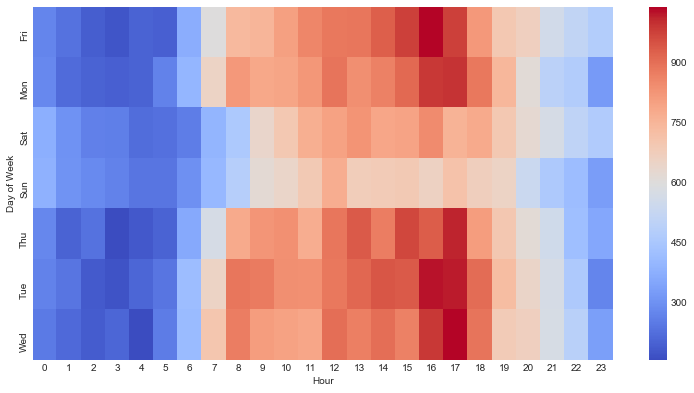

In [392]:
plt.figure(figsize=(13,6.5))
sns.heatmap(dayHourDf,cmap='coolwarm')

** Creating a clustermap using the DataFrame. **

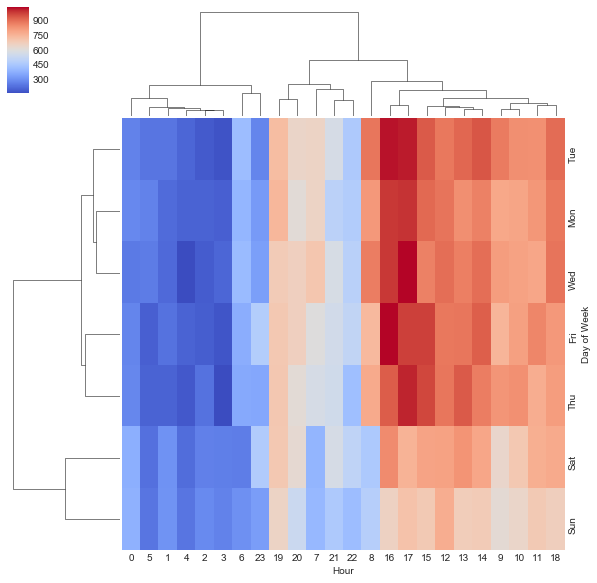

In [394]:
sns.clustermap(dayHourDf,cmap='coolwarm')

** Repeating same plots and operations, for a DataFrame that shows the Month as the column. **

In [406]:
dayMonthDf= df.groupby(['Day of Week','Month']).count()['twp'].unstack()
dayMonthDf

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


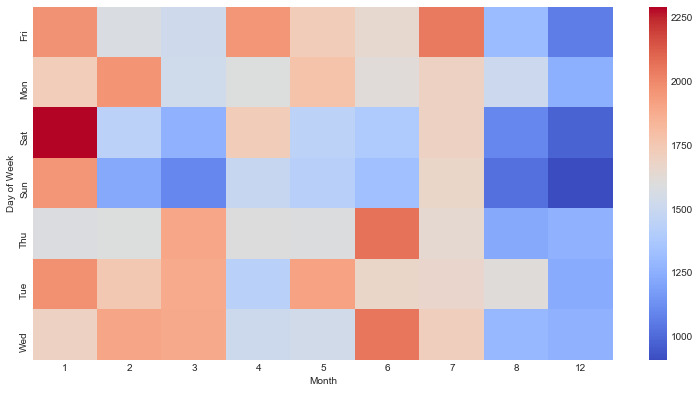

In [410]:
plt.figure(figsize=(13,6.5))
sns.heatmap(dayMonthDf,cmap='coolwarm')

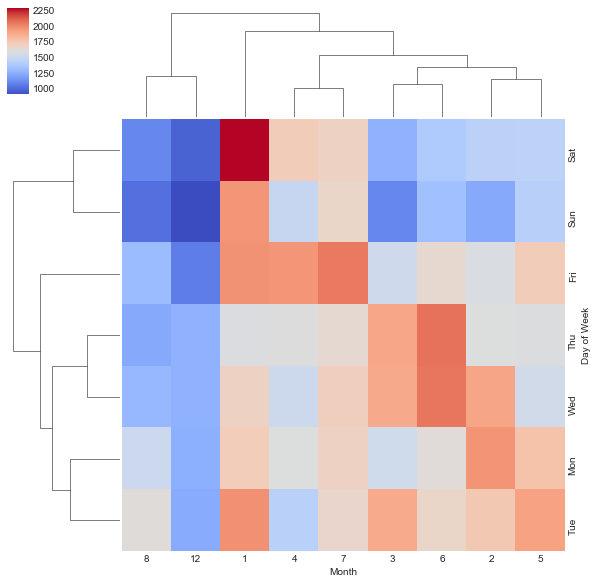

In [413]:
sns.clustermap(dayMonthDf,cmap='coolwarm')


# End of Analysis